## Supriya Panigrahi

### Problem Statement - Silver Sterling is a banking company also into the credit card services. The company was facing various problems cause of payment defaults by the credit card holders. They want to assess the risk of payment default for its various credit card holders by identifying defaulters and non- defaulters. So we are here trying to predict the defaulters so as to mitigate the risk of bad credit.

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import learning_curve, train_test_split
from numpy import bincount
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold, KFold, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go


#### Importing the data and saving a backup

In [2]:
data_backup = pd.read_excel("default of credit card clients.xls",header = 1)
data = data_backup.copy()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Understanding the dataset Variables - 
#### Default payment (Yes = 1, No = 0)
#### LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
#### Sex : Gender (1 = male; 2 = female). 
#### Education: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#### Marriage : Marital status (1 = married; 2 = single; 3 = others). 
#### Age: Age (year). 
#### Pay0 - Pay6 : History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: Pay0 = the repayment status in September, 2005; pay1 = the repayment status in August, 2005; . . .;Pay6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
#### Bill amount1-6 : Amount of bill statement (NT dollar). Bill amount 1 = amount of bill statement in September, 2005; Bill amount 2 = amount of bill statement in August, 2005; . . .; Bill amount 6 = amount of bill statement in April, 2005. 
#### Pay Amount1-6 : Amount of previous payment (NT dollar). Pay Amount1 = amount paid in September, 2005; Pay Amount2 = amount paid in August, 2005  and so on


In [3]:
# Dropping ID as it doesnot add any value to our model
data = data.drop("ID",axis = 1)

#### Basic EDA

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [5]:
# Renaming columns for ease of understanding
data.rename(columns={'default payment next month':'default'}, inplace=True)
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [6]:
# Checking for NULL values
data.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

- There are 30000 observations over 24 columns.
- We have to predict the default column(Dependent Variable)
- We see SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 are categorical variables

0    23364
1     6636
Name: default, dtype: int64


<AxesSubplot:>

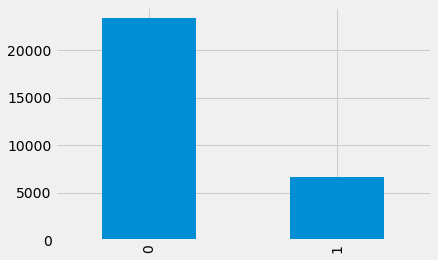

In [8]:
# Check for Dependent variable (default)
print(data.default.value_counts())
data.default.value_counts().plot.bar()

2    18112
1    11888
Name: SEX, dtype: int64


<AxesSubplot:>

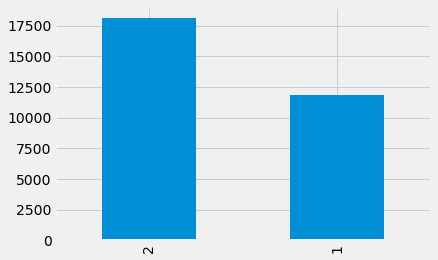

In [9]:
# Check for Independent variable (SEX)
print(data.SEX.value_counts())
data.SEX.value_counts().plot.bar()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


<AxesSubplot:>

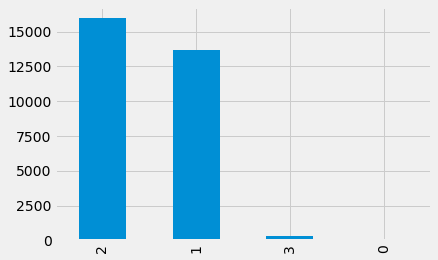

In [10]:
# Check for Independent variable (MARRIAGE)
print(data.MARRIAGE.value_counts())
data.MARRIAGE.value_counts().plot.bar()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


<AxesSubplot:>

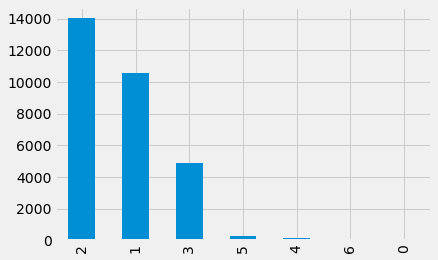

In [11]:
# Check for Independent variable (EDUCATION)
print(data.EDUCATION.value_counts())
data.EDUCATION.value_counts().plot.bar()

- In the variable information, EDUCATION has 4 levels (1 = graduate school; 2 = university; 3 = high school; 4 = others),  we will try to include the additional 0,5 and 6 levels into 4 i.e Others.
- Also MARRIAGE has 3 levels (1 = married; 2 = single; 3 = others), so we will include the additional 0 in 3 i.e others.

In [12]:
data.loc[(data.EDUCATION == 0) | (data.EDUCATION == 5) | (data.EDUCATION == 6), 'EDUCATION'] = 4
data.loc[(data.MARRIAGE == 0), 'MARRIAGE'] = 3

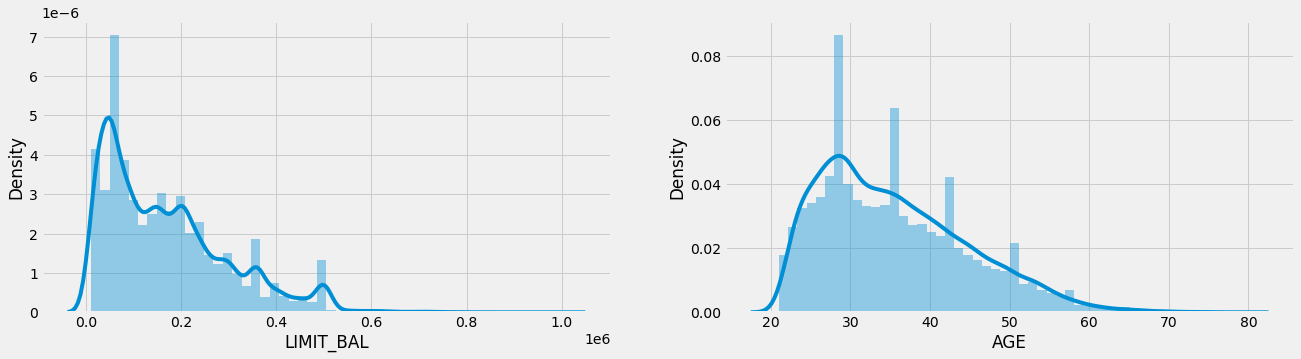

In [13]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(data.LIMIT_BAL)

plt.subplot(122)
sns.distplot(data.AGE)

plt.show()

<AxesSubplot:xlabel='LIMIT_BAL'>

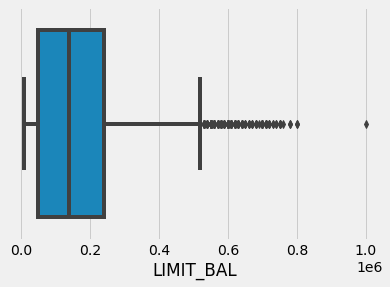

In [14]:
sns.boxplot(x=data['LIMIT_BAL'])

- LIMIT_BAL has many extreme values but they can't be treated as outliers because probably these values belong to high profile custoers.
- The data is highly imbalanced for defaults, so we will use stratified sampling for train-test split which will make sure that the proportions are same for both defaults and non defaults in train and test data.

#### Making Stratified train and test data

In [15]:
## divide up our x and y axis
y_target = data['default'].values

columns = data.columns.tolist()
columns.remove('default')

x_independent = data[columns].values
x_train, x_test, y_train, y_test = train_test_split(x_independent, y_target, test_size =0.30, stratify = y_target, random_state = 1)

print("label counts in y train %s" %bincount(y_train))
print("label counts in y test %s" %bincount(y_test))

label counts in y train [16355  4645]
label counts in y test [7009 1991]


#### Multicollinearity check

In [16]:
# Lets check for multicollinearity through VIF
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
df = data[data.columns[0:23]]
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


- 1st round

In [18]:
#gather features
df1 = df[df.columns[1:len(df)+1]]
features = "+".join(df1.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('LIMIT_BAL ~' + features, df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,62.0,Intercept
1,1.0,SEX
2,1.1,EDUCATION
3,1.2,MARRIAGE
4,1.3,AGE
5,1.9,PAY_1
6,3.1,PAY_2
7,3.7,PAY_3
8,4.3,PAY_4
9,4.7,PAY_5


- 2nd Round

In [19]:
#gather features
df1 = df1.drop("BILL_AMT2",axis = 1)
features = "+".join(df1.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('LIMIT_BAL ~' + features, df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,62.0,Intercept
1,1.0,SEX
2,1.1,EDUCATION
3,1.2,MARRIAGE
4,1.3,AGE
5,1.9,PAY_1
6,3.1,PAY_2
7,3.6,PAY_3
8,4.3,PAY_4
9,4.7,PAY_5


- 3rd Round

In [20]:
#gather features
df1 = df1.drop("BILL_AMT5",axis = 1)
features = "+".join(df1.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('LIMIT_BAL ~' + features, df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,62.0,Intercept
1,1.0,SEX
2,1.1,EDUCATION
3,1.2,MARRIAGE
4,1.3,AGE
5,1.9,PAY_1
6,3.1,PAY_2
7,3.6,PAY_3
8,4.3,PAY_4
9,4.7,PAY_5


In [21]:
#gather features
df1 = df1.drop("BILL_AMT4",axis = 1)
features = "+".join(df1.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('LIMIT_BAL ~' + features, df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,62.0,Intercept
1,1.0,SEX
2,1.1,EDUCATION
3,1.2,MARRIAGE
4,1.3,AGE
5,1.9,PAY_1
6,3.1,PAY_2
7,3.6,PAY_3
8,4.3,PAY_4
9,4.7,PAY_5


- 4th Round

In [22]:
#gather features
df1 = df1.drop("BILL_AMT3",axis = 1)
features = "+".join(df1.columns)

# get y and X dataframes based on this regression:
y, X = dmatrices('LIMIT_BAL ~' + features, df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,62.0,Intercept
1,1.0,SEX
2,1.1,EDUCATION
3,1.2,MARRIAGE
4,1.3,AGE
5,1.9,PAY_1
6,3.1,PAY_2
7,3.6,PAY_3
8,4.3,PAY_4
9,4.7,PAY_5


In [23]:
df1.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,0,689,0,0,0,0
1,2,2,2,26,-1,2,0,0,0,2,2682,3261,0,1000,1000,1000,0,2000
2,2,2,2,34,0,0,0,0,0,0,29239,15549,1518,1500,1000,1000,1000,5000
3,2,2,1,37,0,0,0,0,0,0,46990,29547,2000,2019,1200,1100,1069,1000
4,1,2,1,57,-1,0,-1,0,0,0,8617,19131,2000,36681,10000,9000,689,679


#### Dividing train and test after multicollinearity check

In [24]:
## divide up our x and y axis
df1['default'] = data['default']
y_target = df1['default'].values

columns = df1.columns.tolist()
columns.remove('default')

x_independent = df1[columns].values


x_train, x_test, y_train, y_test = train_test_split(x_independent, y_target, test_size =0.30, stratify = y_target, random_state = 1)

print("label counts in y train %s" %bincount(y_train))
print("label counts in y test %s" %bincount(y_test))

label counts in y train [16355  4645]
label counts in y test [7009 1991]


#### Logistic Regression

In [25]:
# Making standardised train and test 
x_train_std = (x_train - x_train.mean()) / x_train.std()
x_test_std = (x_test - x_train.mean()) / x_train.std()

In [26]:
logit = LogisticRegression()
logit.fit(x_train_std, y_train)

y_pred = logit.predict(x_test_std)
y_train_pred = logit.predict(x_train_std)

print(classification_report(y_pred, y_test))
print("Confusion Matrix")
print(pd.DataFrame(confusion_matrix(y_pred, y_test)))
print('\nAccuracy Score for test: ', accuracy_score(y_pred,y_test))
print('\nAccuracy Score for train: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      9000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      9000
   macro avg       0.50      0.39      0.44      9000
weighted avg       1.00      0.78      0.88      9000

Confusion Matrix
      0     1
0  7009  1991
1     0     0

Accuracy Score for test:  0.7787777777777778

Accuracy Score for train:  0.7788571428571428


#### Decision Tree

In [27]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 6, 'max_features': 5, 'max_depth': 5, 'criterion': 'entropy'}


Accuracy: 0.819

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7009
           1       0.65      0.40      0.49      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.67      0.69      9000
weighted avg       0.80      0.82      0.80      9000


Average 5-Fold CV Score: 0.8172 , Standard deviation: 0.0045


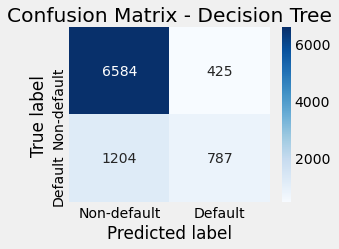

In [28]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(x_train, y_train)
y_pred = Tree.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, x_train, y_train, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

#### Random Forest

In [34]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(x_train, y_train)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 6, 'criterion': 'gini'}


In [35]:
preds = rf_cv.predict(x_test)
print('Accuracy:', metrics.accuracy_score(preds,y_test))

Accuracy: 0.8186666666666667



              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000


Average 5-Fold CV Score: 0.8218 , Standard deviation: 0.0044


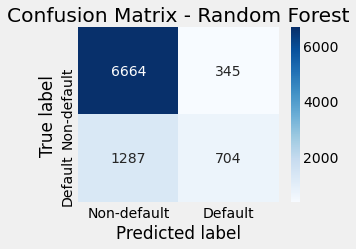

In [36]:
## 5-fold cross-validation 
cv_scores =cross_val_score(rf_cv,x_train, y_train, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, preds))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,rf_cv.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

- Based on the accuracy scores, Random forest gives us the max accuracy as 0.8194, Thus Random forest was picked out of the lot as it also solves the problem of overfitting.

#### Intrepretation of the statistical Model in Business Terms -  Accuracy of 0.8194 suggests that 81.94 % times the defaulters and non defaulters were correctly identified. This could be useful in lending out credit cards to the right customers (8 out of 10) and lowering the risk of defaulting customers.